In [2]:
# Should only need to run this once!
import requests
req = requests.get('http://keeptradecut.com/dynasty-rankings', 'html.parser')
lines = req.text.split('\n')

In [64]:
# ONLY LOAD THIS TO RESET MAPPINGS FOR PLAYERS
players = requests.get('https://api.sleeper.app/v1/players/nfl').text
with open('playersJSON.txt', 'w') as f:
    f.write(players)

In [3]:
import re
for line in lines:
    if re.search("var playersArray = (.*);", line):
        bigSet = re.search("var playersArray = (.*);", line).group(1)

In [4]:
import json
tmp = json.loads(bigSet)
players = dict()
for player in tmp:
    players[player['playerName']] = player

In [6]:
users = json.loads(requests.get('https://api.sleeper.app/v1/league/788795076431249408/users').text)

In [7]:
userKeys = dict()
for user in users:
    userKeys[user['user_id']] = {'Name': user['display_name']}

In [8]:
rosters = json.loads(requests.get('https://api.sleeper.app/v1/league/788795076431249408/rosters').text)

In [21]:
with open('playersJSON.txt', 'r') as r:
    playersSleeper = json.load(r)

{'birth_state': None, 'hashtag': '#irvsmith-NFL-MIN-84', 'height': '74', 'sportradar_id': 'ed0e6a30-83d5-4f4b-bf49-f7ff80e21304', 'injury_notes': None, 'rotowire_id': 13583, 'espn_id': 4040980, 'metadata': None, 'fantasy_positions': ['TE'], 'yahoo_id': 31882, 'search_rank': 148, 'search_last_name': 'smith', 'age': 23, 'weight': '240', 'practice_description': None, 'status': 'Active', 'team': 'MIN', 'number': 84, 'injury_body_part': None, 'fantasy_data_id': 20949, 'swish_id': 944428, 'search_full_name': 'irvsmith', 'position': 'TE', 'injury_status': 'Questionable', 'years_exp': 3, 'high_school': 'Brother Martin (LA)', 'college': 'Alabama', 'first_name': 'Irv', 'depth_chart_position': 'TE', 'news_updated': 1650820847413, 'gsis_id': ' 00-0034970', 'practice_participation': None, 'birth_country': None, 'sport': 'nfl', 'full_name': 'Irv Smith', 'birth_city': None, 'depth_chart_order': 1, 'search_first_name': 'irv', 'stats_id': 944428, 'birth_date': '1998-08-09', 'pandascore_id': None, 'acti

In [28]:
# get list of NAMES of players from sleeper
playerSleeperNames = []
for x in playersSleeper:
    if 'full_name' in playersSleeper[x]:
        playerSleeperNames.append(playersSleeper[x]['full_name'])

In [31]:
# find all the wrong names from KTC
for name in players.keys():
    if name not in playerSleeperNames and "20" not in name:
        print(name)

D.J. Moore
Kenneth Walker III
Irv Smith Jr.
Josh Palmer
Will Fuller
Pierre Strong Jr.
Calvin Austin III
Jeffery Wilson
Olabisi Johnson
Lamical Perine


In [ ]:
'''
# Fix these names
DJ Moore
Kenneth Walker
Irv Smith
Joshua Palmer
William Fuler
Pier Strong
Calvin Austin
Jeff Wilson
La\'Mical Perine
Bisi Johnson
'''

In [34]:
translations = {
    "DJ Moore": "D.J. Moore",
    "Kenneth Walker": "Kenneth Walker III",
    "Irv Smith": "Irv Smith Jr.",
    "Joshua Palmer": "Josh Palmer",
    "William Fuller": "Will Fuller",
    "Pierre Strong": "Pierre Strong Jr.",
    "Calvin Austin": "Calvin Austin III",
    "Jeff Wilson": "Jeffery Wilson",
    "Bisi Johnson": "Olabisi Johnson",
    "La'Mical Perine": "Lamical Perine"
}
for roster in rosters:
    p = roster['players']
    userKeys[roster['owner_id']]['players'] = []
    for pl in p:
        name = playersSleeper[str(pl)]['full_name']
        ktc_name = name
        if ktc_name in translations:
            ktc_name = translations[ktc_name]
        userKeys[roster['owner_id']]['players'].append(
            (name, 
             players[ktc_name]['position'], 
             players[ktc_name]['oneQBValues']['value']
            ))

In [36]:
import pprint
pp = pprint.PrettyPrinter(indent=1, depth=5)
pp.pprint(userKeys)

{'315959248414593024': {'Name': 'JM3Elite',
                        'players': [('Amari Cooper', 'WR', 4998),
                                    ('Ezekiel Elliott', 'RB', 4487),
                                    ('Hunter Henry', 'TE', 2314),
                                    ('Christian McCaffrey', 'RB', 6879),
                                    ('JuJu Smith-Schuster', 'WR', 4319),
                                    ('Ronald Jones', 'RB', 2661),
                                    ('Noah Fant', 'TE', 3297),
                                    ('Tony Pollard', 'RB', 3941),
                                    ('Joe Burrow', 'QB', 5885),
                                    ('Jerry Jeudy', 'WR', 5596),
                                    ('Mac Jones', 'QB', 3185),
                                    ("Ja'Marr Chase", 'WR', 9989),
                                    ('George Pickens', 'WR', 4303),
                                    ('Desmond Ridder', 'QB', 1917),
                   

In [62]:
scores = []
for owner in userKeys:
    scores.append([
        userKeys[owner]['Name'],
        sum([x[2] for x in userKeys[owner]['players'] if x[1] == 'QB']),
        sum([x[2] for x in userKeys[owner]['players'] if x[1] == 'RB']),
        sum([x[2] for x in userKeys[owner]['players'] if x[1] == 'WR']),
        sum([x[2] for x in userKeys[owner]['players'] if x[1] == 'TE']),
        sum([x[2] for x in userKeys[owner]['players']])

    ])

In [63]:
print(scores)

[['dpaine88', 8196, 25778, 26457, 7553, 67984], ['trickz2288', 4573, 9476, 27443, 1309, 42801], ['JM3Elite', 10987, 20601, 29205, 5611, 66404], ['branflakes213', 9046, 21142, 22515, 3141, 55844], ['jdleclerc5', 7441, 31810, 28671, 5712, 73634], ['n8gainz', 4527, 10552, 29574, 5322, 49975], ['Isufg', 7168, 15413, 21224, 6976, 50781], ['mcouture5', 9302, 11635, 22269, 9968, 53174], ['Bcarlson92', 5308, 12739, 25874, 8, 43929], ['Bixby91', 8983, 15476, 24381, 3998, 52838], ['Bubblehulk', 7528, 16217, 20659, 12249, 56653], ['phealy5', 3916, 13671, 11960, 2376, 31923], ['glorydayboy24', 8085, 17868, 26837, 4991, 57781], ['dbyrne978', 4029, 19369, 25466, 9262, 58126], ['RenfrowsMyDaddy', 9874, 15992, 28106, 8803, 62775], ['BellasBoys', 11342, 19534, 25101, 12932, 68909]]


In [46]:
import matplotlib.pyplot as plt

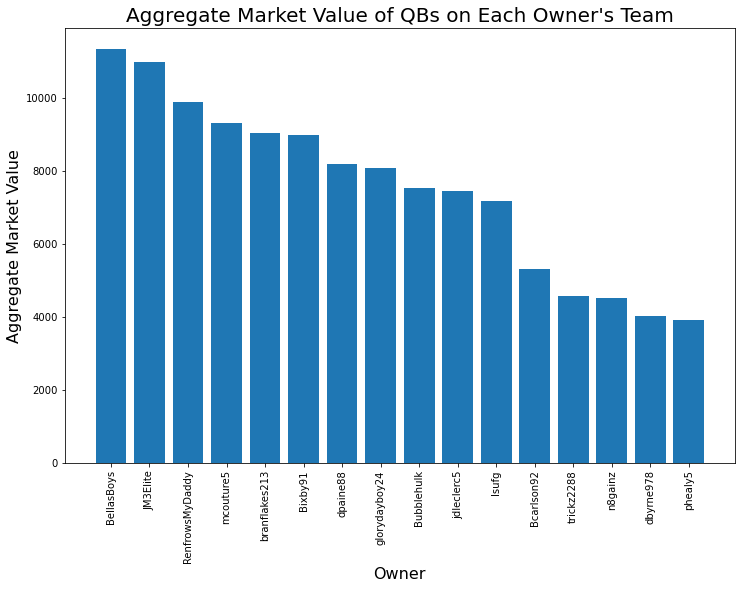

In [57]:
scores = sorted(scores, key=lambda x: x[1], reverse=True)
players = [x[0] for x in scores]
QBscore = [x[1] for x in scores]
fig = plt.figure(figsize = (12,8))
plt.bar(players, QBscore)
plt.xlabel('Owner', fontsize=16)
plt.xticks(rotation = 90)
plt.ylabel('Aggregate Market Value', fontsize=16)
plt.title("Aggregate Market Value of QBs on Each Owner's Team", fontsize=20)
plt.show()

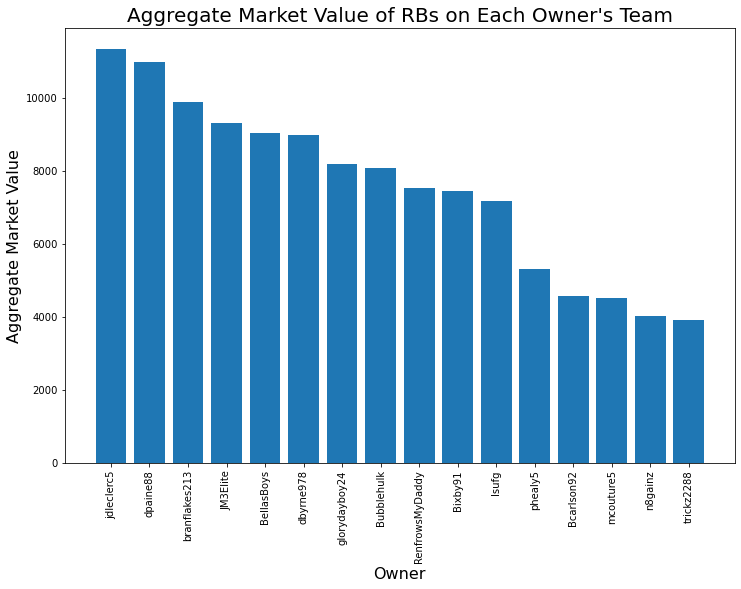

In [58]:
scores = sorted(scores, key=lambda x: x[2], reverse=True)
players = [x[0] for x in scores]
RBscore = [x[2] for x in scores]
fig = plt.figure(figsize = (12,8))
plt.bar(players, QBscore)
plt.xlabel('Owner', fontsize=16)
plt.xticks(rotation = 90)
plt.ylabel('Aggregate Market Value', fontsize=16)
plt.title("Aggregate Market Value of RBs on Each Owner's Team", fontsize=20)
plt.show()

In [64]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

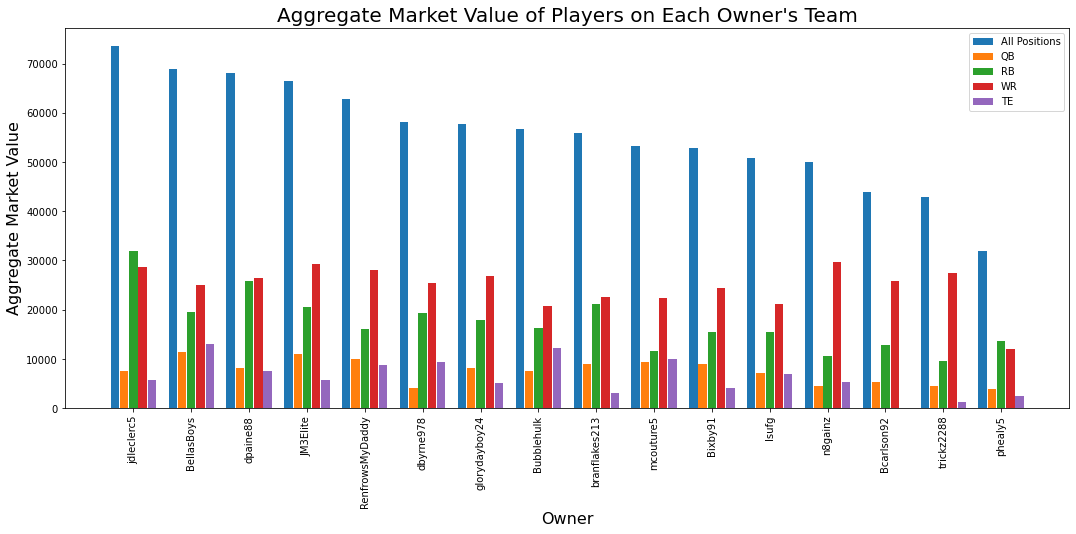

In [80]:
scores = sorted(scores, key=lambda x: x[5], reverse=True)
players = [x[0] for x in scores]
QBscore = [x[1] for x in scores]
RBscore = [x[2] for x in scores]
WRscore = [x[3] for x in scores]
TEscore = [x[4] for x in scores]
ALLscore = [x[5] for x in scores]
data = {"All Positions": ALLscore, "QB": QBscore, "RB": RBscore, "WR": WRscore, "TE": TEscore, }
fig, ax = plt.subplots(1,1, figsize=(18,7))
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xticks(range(16), players, rotation=90)
plt.xlabel('Owner', fontsize=16)
plt.ylabel('Aggregate Market Value', fontsize=16)
plt.title("Aggregate Market Value of Players on Each Owner's Team", fontsize=20)
plt.show()